In [79]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from textblob import TextBlob

nltk.download("stopwords")
nltk.download("wordnet")
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pratikrathod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pratikrathod/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
# loading the dataset
dt = pd.read_csv("financial_sentiment_data.csv")

In [82]:
# creating a copy of data
df = dt.copy()

In [83]:
dt

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [84]:
dt.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

In [85]:
dt.shape

(5842, 2)

In [86]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [87]:
dt["Sentiment"].value_counts()

Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64

##Visualizations

In [88]:
# using bar plot for finding out the count of the sentiments

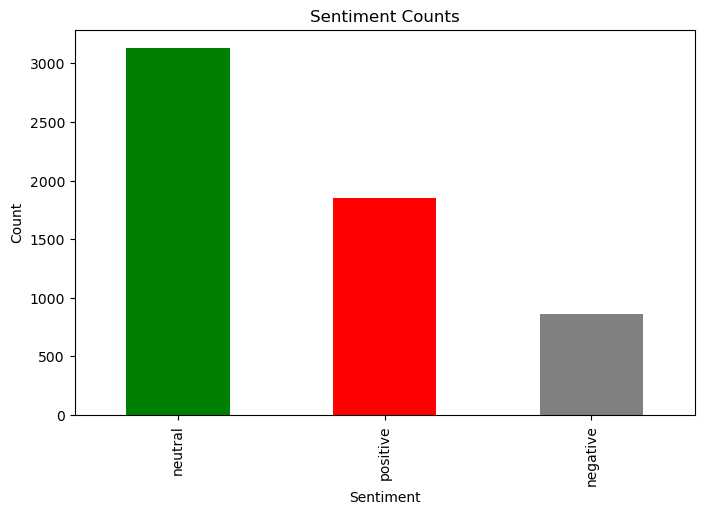

In [89]:
plt.figure(figsize=(8,5))
dt['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

##Preprocessing

In [90]:
dt

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [91]:
#Lowercasing

In [92]:
dt["Sentence"] = dt["Sentence"].str.lower()

In [93]:
dt

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,"according shipping company viking line , the e...",neutral
5840,"in the building and home improvement trade , s...",neutral


In [94]:
# Removing the hyperlinks

In [95]:
dt["Sentence"] = dt["Sentence"].replace(r"http\S+", '', regex=True)

In [96]:
dt

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,"according shipping company viking line , the e...",neutral
5840,"in the building and home improvement trade , s...",neutral


In [97]:
# Removing special characters, punctuations and keeping the numbers

In [98]:
dt["Sentence"] = dt["Sentence"].replace("[^a-zA-Z0-9\s]", '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/sn/c3lg3x695wzd4bsqm415jv980000gn/T/ipykernel_3051/1338797820.py:1: SyntaxWarning: invalid escape sequence '\s'
  dt["Sentence"] = dt["Sentence"].replace("[^a-zA-Z0-9\s]", '', regex=True)


In [99]:
dt

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,esi on lows down 150 to 250 bk a real possibility,negative
2,for the last quarter of 2010 componenta s net...,positive
3,according to the finnishrussian chamber of com...,neutral
4,the swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,rising costs have forced packaging producer hu...,negative
5838,nordic walking was first used as a summer trai...,neutral
5839,according shipping company viking line the eu...,neutral
5840,in the building and home improvement trade sa...,neutral


In [100]:
# Now lets perform Tokenization

In [104]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/pratikrathod/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [105]:
dt["Sentence"] = dt["Sentence"].apply(word_tokenize)

In [106]:
dt

,Sentence,Sentiment
0,"[the, geosolutions, technology, will, leverage...",positive
1,"[esi, on, lows, down, 150, to, 250, bk, a, rea...",negative
2,"[for, the, last, quarter, of, 2010, componenta...",positive
3,"[according, to, the, finnishrussian, chamber, ...",neutral
4,"[the, swedish, buyout, firm, has, sold, its, r...",neutral
...,...,...
5837,"[rising, costs, have, forced, packaging, produ...",negative
5838,"[nordic, walking, was, first, used, as, a, sum...",neutral
5839,"[according, shipping, company, viking, line, t...",neutral
5840,"[in, the, building, and, home, improvement, tr...",neutral


In [107]:
# Removing stopwords

In [109]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pratikrathod/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [113]:
stop_words = set(stopwords.words("english"))

In [114]:
dt["Sentence"] = dt["Sentence"].apply(lambda x:[word for word in x if word not in stop_words])

In [115]:
dt

,Sentence,Sentiment
0,"[geosolutions, technology, leverage, benefon, ...",positive
1,"[esi, lows, 150, 250, bk, real, possibility]",negative
2,"[last, quarter, 2010, componenta, net, sales, ...",positive
3,"[according, finnishrussian, chamber, commerce,...",neutral
4,"[swedish, buyout, firm, sold, remaining, 224, ...",neutral
...,...,...
5837,"[rising, costs, forced, packaging, producer, h...",negative
5838,"[nordic, walking, first, used, summer, trainin...",neutral
5839,"[according, shipping, company, viking, line, e...",neutral
5840,"[building, home, improvement, trade, sales, de...",neutral


In [116]:
# Now lets perform lemmatization on the tokenized data

In [118]:
pip install spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.7/634.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.0/761.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 8.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [120]:
# loading spacy english language model
import spacy
nlp = spacy.load("en_core_web_sm")

In [121]:
dt["Sentence"] = dt["Sentence"].apply(lambda tokens:[token.lemma_ for token in nlp(" ".join(tokens))])

In [122]:
dt

,Sentence,Sentiment
0,"[geosolution, technology, leverage, benefon, g...",positive
1,"[esi, low, 150, 250, bk, real, possibility]",negative
2,"[last, quarter, 2010, componenta, net, sale, d...",positive
3,"[accord, finnishrussian, chamber, commerce, ma...",neutral
4,"[swedish, buyout, firm, sell, remain, 224, per...",neutral
...,...,...
5837,"[rise, cost, force, packaging, producer, huhta...",negative
5838,"[nordic, walking, first, use, summer, training...",neutral
5839,"[accord, ship, company, vike, line, eu, decisi...",neutral
5840,"[build, home, improvement, trade, sale, decrea...",neutral


In [123]:
# Now lets join the lemmatized words back into the sentence

In [124]:
dt["Sentence"] = dt["Sentence"].apply(lambda x: " ".join(x))

In [125]:
dt

,Sentence,Sentiment
0,geosolution technology leverage benefon gps so...,positive
1,esi low 150 250 bk real possibility,negative
2,last quarter 2010 componenta net sale double e...,positive
3,accord finnishrussian chamber commerce major c...,neutral
4,swedish buyout firm sell remain 224 percent st...,neutral
...,...,...
5837,rise cost force packaging producer huhtamaki a...,negative
5838,nordic walking first use summer training metho...,neutral
5839,accord ship company vike line eu decision sign...,neutral
5840,build home improvement trade sale decrease 225...,neutral


#Visualization

In [126]:
dt.head()

,Sentence,Sentiment
0,geosolution technology leverage benefon gps so...,positive
1,esi low 150 250 bk real possibility,negative
2,last quarter 2010 componenta net sale double e...,positive
3,accord finnishrussian chamber commerce major c...,neutral
4,swedish buyout firm sell remain 224 percent st...,neutral


In [127]:
#Pie Chart

In [128]:
fig = plt.figure(figsize=(7,7))
colours = ("red","yellow","purple")
le = {"linewidth":2,"edgecolor":"black"}
tags = dt["Sentiment"].value_counts()
explode_wedge = (0.1,0.1,0.1)
tags.plot(kind="pie",autopct="%1.1f%%",shadow=True,colors = colours,startangle = 50,wedgeprops = le, explode = explode_wedge,label = "")
plt.title("Sentiment Distribution")

Text(0.5, 1.0, 'Sentiment Distribution')

In [129]:
# WordCloud For Positive Sentences

In [130]:
pos_sentences = dt[dt["Sentiment"] == "positive"]["Sentence"].values

In [131]:
# we are importing this library for loading the picture
from PIL import Image

In [132]:
pic = np.array(Image.open("pic.jpg"))

In [133]:
pic_wc = WordCloud(background_color="black",mask = pic)
pic_wc.generate(' '.join(pos_sentences))

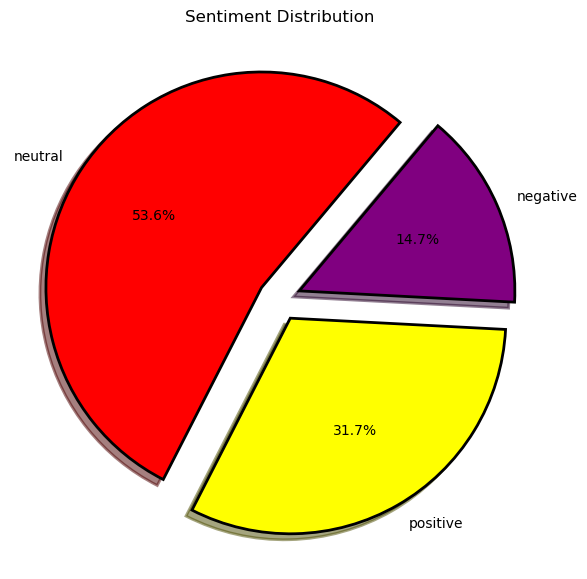

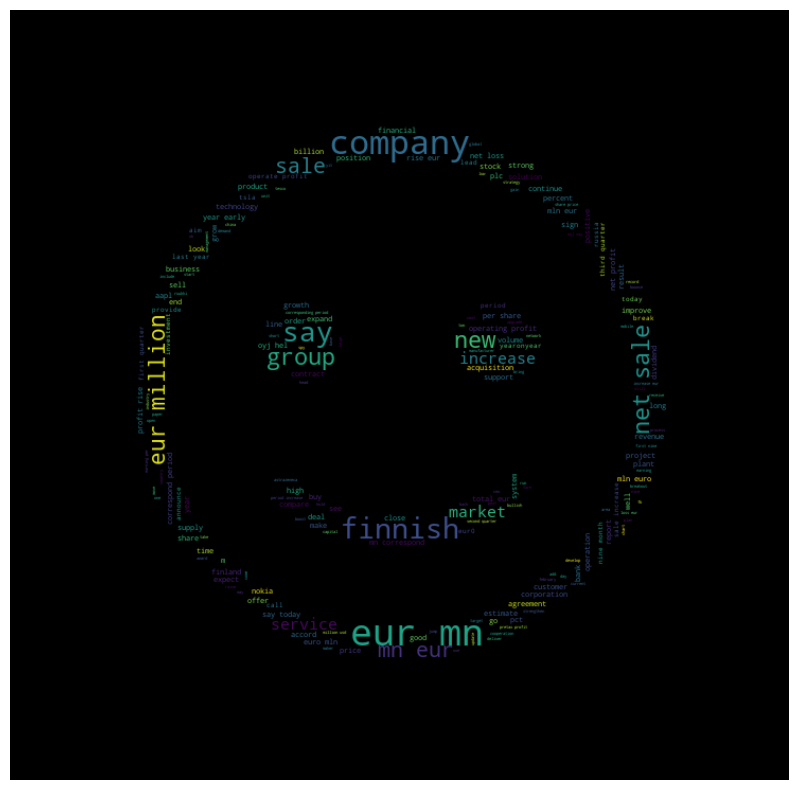

In [134]:
plt.figure(figsize=(15,10))
plt.imshow(pic_wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [135]:
# WordCloud For Negative Sentences

In [136]:
neg_sentences = dt[dt["Sentiment"] == "negative"]["Sentence"].values

In [137]:
pic1 = np.array(Image.open("sad.jpg"))

In [138]:
pic_wc1 = WordCloud(background_color="black",mask = pic1)
pic_wc1.generate(' '.join(neg_sentences))

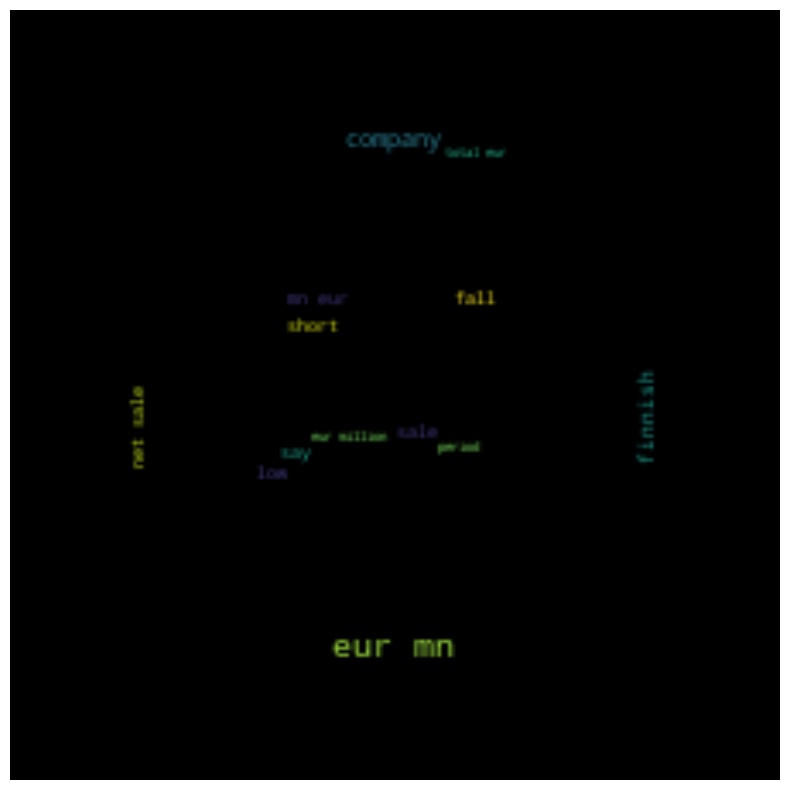

In [139]:
plt.figure(figsize=(15,10))
plt.imshow(pic_wc1,interpolation="bilinear")
plt.axis("off")
plt.show()

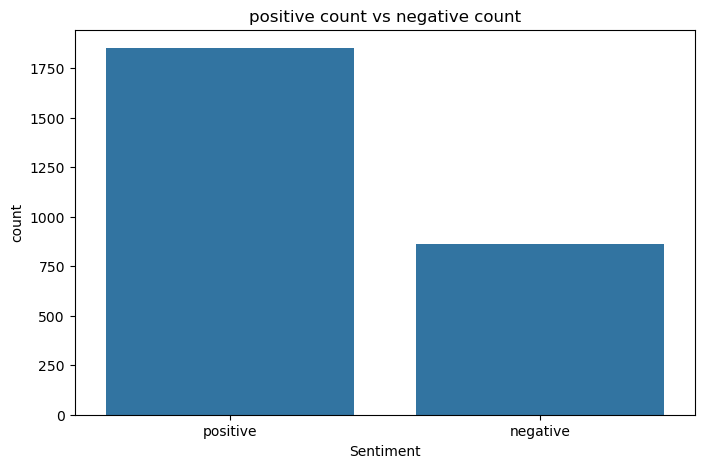

In [140]:
# count plot visualization
plt.figure(figsize=(8,5))
sns.countplot(x="Sentiment",data=dt,order=["positive","negative"])
plt.title("positive count vs negative count")
plt.show()

In [141]:
# finding out the lenght of the sentences
dt["Sentence_Length"]=dt["Sentence"].apply(len)
dt

,Sentence,Sentiment,Sentence_Length
0,geosolution technology leverage benefon gps so...,positive,178
1,esi low 150 250 bk real possibility,negative,35
2,last quarter 2010 componenta net sale double e...,positive,122
3,accord finnishrussian chamber commerce major c...,neutral,88
4,swedish buyout firm sell remain 224 percent st...,neutral,99
...,...,...,...
5837,rise cost force packaging producer huhtamaki a...,negative,85
5838,nordic walking first use summer training metho...,neutral,66
5839,accord ship company vike line eu decision sign...,neutral,70
5840,build home improvement trade sale decrease 225...,neutral,58


In [142]:
# word count(Top 10)
from collections import Counter

In [143]:
pos_sentences = dt[dt["Sentiment"]=="positive"]["Sentence"].values
neg_sentences = dt[dt["Sentiment"]=="negative"]["Sentence"].values
neu_sentences = dt[dt["Sentiment"]=="neutral"]["Sentence"].values

In [144]:
#tokenizing sentences into words
positive_words = nltk.word_tokenize(" ".join(pos_sentences))
negative_words = nltk.word_tokenize(" ".join(neg_sentences))
neutral_words = nltk.word_tokenize(" ".join(neu_sentences))

In [145]:
# counting of occurences of each word using Counter
positive_word_cnt = Counter(positive_words)
negative_word_cnt = Counter(negative_words)
neutral_word_cnt = Counter(neutral_words)

In [146]:
# most common positive,negative and neutral words(top 10)
top_pos_words=positive_word_cnt.most_common(10)
top_neg_words=negative_word_cnt.most_common(10)
top_neu_words=neutral_word_cnt.most_common(10)
print("Most common positive words",top_pos_words)
print("Most common negative words",top_neg_words)
print("Most common neutral words",top_neu_words)

Most common positive words [('eur', 436), ('mn', 239), ('company', 232), ('sale', 225), ('say', 221), ('profit', 208), ('net', 197), ('finnish', 177), ('increase', 171), ('million', 164)]
Most common negative words [('eur', 311), ('mn', 220), ('profit', 160), ('sale', 104), ('net', 100), ('company', 89), ('finnish', 89), ('2009', 80), ('period', 80), ('fall', 79)]
Most common neutral words [('company', 596), ('eur', 537), ('share', 328), ('say', 283), ('mn', 270), ('finnish', 261), ('sale', 261), ('million', 250), ('finland', 223), ('profit', 216)]


In [147]:
# creating a subplot for visualization
positive_words, positive_counts = zip(*top_pos_words)
negative_words, negative_counts = zip(*top_neg_words)
neutral_words, neutral_counts = zip(*top_neu_words)

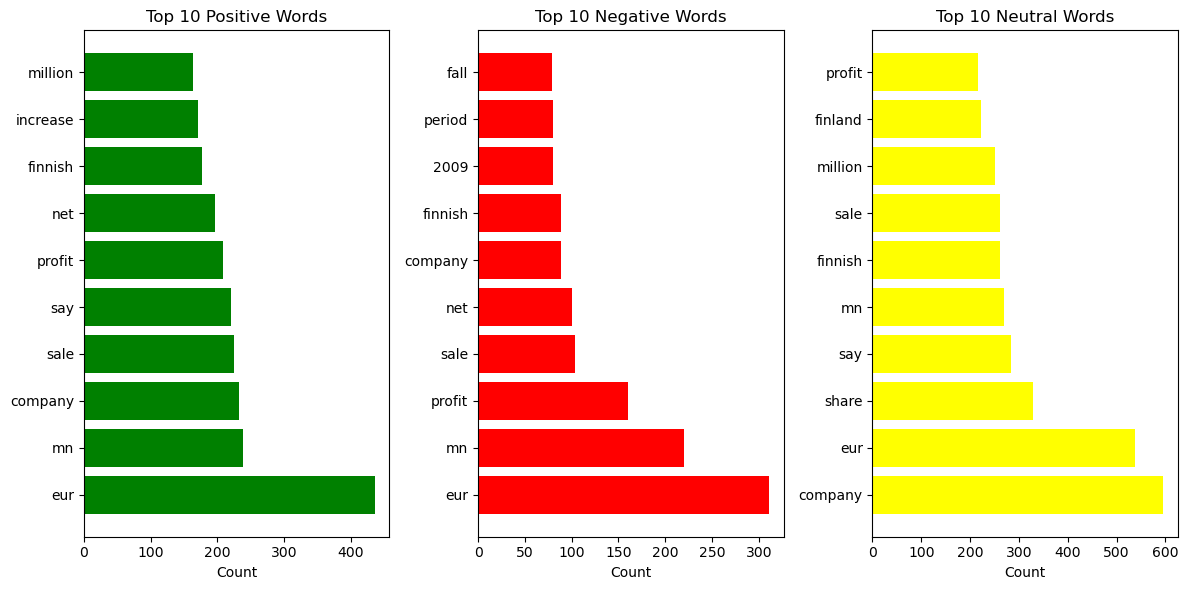

In [148]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.barh(positive_words, positive_counts, color="green")
plt.title("Top 10 Positive Words")
plt.xlabel("Count")
plt.subplot(1, 3, 2)
plt.barh(negative_words, negative_counts, color="red")
plt.title("Top 10 Negative Words")
plt.xlabel("Count")
plt.subplot(1,3,3)
plt.barh(neutral_words, neutral_counts, color="yellow")
plt.title("Top 10 Neutral Words")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

In [149]:
# finding out the polarity

In [150]:
def polarity(Sentence):
  return TextBlob(Sentence).sentiment.polarity

In [151]:
dt["Polarity"] = dt["Sentence"].apply(polarity)

In [152]:
dt

,Sentence,Sentiment,Sentence_Length,Polarity
0,geosolution technology leverage benefon gps so...,positive,178,0.007273
1,esi low 150 250 bk real possibility,negative,35,0.100000
2,last quarter 2010 componenta net sale double e...,positive,122,0.025000
3,accord finnishrussian chamber commerce major c...,neutral,88,0.062500
4,swedish buyout firm sell remain 224 percent st...,neutral,99,-0.100000
...,...,...,...,...
5837,rise cost force packaging producer huhtamaki a...,negative,85,0.000000
5838,nordic walking first use summer training metho...,neutral,66,0.250000
5839,accord ship company vike line eu decision sign...,neutral,70,0.187500
5840,build home improvement trade sale decrease 225...,neutral,58,0.000000


In [153]:
# comparing unclean and cleaned sentences
sent1 = df["Sentence"]
sent2 = dt["Sentence"]
processed = pd.DataFrame({
    "Unclean Sentences":sent1,
    "Cleaned Sentences":sent2
})
processed

,Unclean Sentences,Cleaned Sentences
0,The GeoSolutions technology will leverage Bene...,geosolution technology leverage benefon gps so...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",esi low 150 250 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",last quarter 2010 componenta net sale double e...
3,According to the Finnish-Russian Chamber of Co...,accord finnishrussian chamber commerce major c...
4,The Swedish buyout firm has sold its remaining...,swedish buyout firm sell remain 224 percent st...
...,...,...
5837,RISING costs have forced packaging producer Hu...,rise cost force packaging producer huhtamaki a...
5838,Nordic Walking was first used as a summer trai...,nordic walking first use summer training metho...
5839,"According shipping company Viking Line , the E...",accord ship company vike line eu decision sign...
5840,"In the building and home improvement trade , s...",build home improvement trade sale decrease 225...


##Model Building

In [154]:
# first we have to convert all the sentences and sentiments into numeric

In [155]:
dt["Sentiment"] = dt["Sentiment"].replace(["negative","neutral","positive"],[0,1,2])

/var/folders/sn/c3lg3x695wzd4bsqm415jv980000gn/T/ipykernel_3051/938940697.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt["Sentiment"] = dt["Sentiment"].replace(["negative","neutral","positive"],[0,1,2])


In [156]:
dt

,Sentence,Sentiment,Sentence_Length,Polarity
0,geosolution technology leverage benefon gps so...,2,178,0.007273
1,esi low 150 250 bk real possibility,0,35,0.100000
2,last quarter 2010 componenta net sale double e...,2,122,0.025000
3,accord finnishrussian chamber commerce major c...,1,88,0.062500
4,swedish buyout firm sell remain 224 percent st...,1,99,-0.100000
...,...,...,...,...
5837,rise cost force packaging producer huhtamaki a...,0,85,0.000000
5838,nordic walking first use summer training metho...,1,66,0.250000
5839,accord ship company vike line eu decision sign...,1,70,0.187500
5840,build home improvement trade sale decrease 225...,1,58,0.000000


In [157]:
# now we will use tfidvectorizer for converting the sentences into numeric

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [159]:
corpus =cv.fit_transform(dt["Sentence"]).toarray()

##Splitting the data for model Building

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
x = corpus
y = dt["Sentiment"]

In [162]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)
print(ytrain)

2631    1
772     1
583     1
2913    0
4201    2
       ..
4722    1
3340    1
5426    1
3064    0
3398    2
Name: Sentiment, Length: 4673, dtype: int64


##Logistic Regression Model

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [164]:
LR = LogisticRegression

In [165]:
# Performing hyperparameter tuning using RandomizedSearchcv

In [166]:
param_dist = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "max_iter":[50, 100, 200, 500]
}

In [167]:
# creating randomizedsearchcv object

In [168]:
random_search = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions = param_dist,
    n_iter = 10,
    cv = 10,
    scoring = "accuracy",
    random_state = 42,
    n_jobs = 1
    )

In [169]:
# fitting randomizedsearchcv object to my data
random_search.fit(xtrain,ytrain)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'max_iter': [50, 100, 200, 500]},
                   random_state=42, scoring='accuracy')

In [170]:
# printing the best parameters and score
print("Best Parameters :","",random_search.best_params_)
print("Best Score :","",random_search.best_score_)

Best Parameters :  {'max_iter': 100, 'C': 1}
Best Score :  0.6909890371346474


In [171]:
# finding out the score for test data
from sklearn.metrics import classification_report, accuracy_score
ypred = random_search.predict(xtest)
test_accuracy = accuracy_score(ytest,ypred)
print("Test Accuracy Score :","",test_accuracy)

Test Accuracy Score :  0.6988879384088965


In [172]:
# finding out the score for train data
best_estimator= random_search.best_estimator_
train_accuracy = best_estimator.score(xtrain,ytrain)
print("Train Accuracy Score : ",train_accuracy)

Train Accuracy Score :  0.811256152364648


In [173]:
# lets use cross_val_score

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
cvs = cross_val_score(LogisticRegression(),x,y,cv=5,scoring="accuracy")

In [176]:
print("Mean of Cross Val Score : ",cvs.mean())

Mean of Cross Val Score :  0.6917143208690252


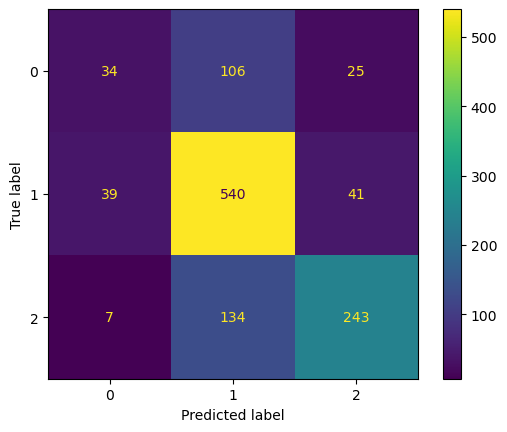

In [177]:
# Using confusion_matrix for understanding the prediction made by the model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest,ypred,labels=random_search.classes_,)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=random_search.classes_)
display.plot()
plt.show()

##Multinomial Naive Bayes

In [178]:
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import loguniform

In [179]:
NB = MultinomialNB()

In [180]:
# lets perform Hyperparameter tuning

In [181]:
# defining the parameters
params_dist = {
    "alpha" : loguniform(1e-3,1e3)# we use alpha param is smoothing param, this avoids zero probabilities for features that dont appear in training data
}

In [182]:
# creating randomsearchcv object

In [183]:
random_search1 = RandomizedSearchCV(
    NB,
    param_distributions =params_dist,
    n_iter = 10,
    cv = 5,
    scoring = "accuracy",
    random_state = 42,
    n_jobs = -1 # this specifies number of parallel jobs to run during the hyperparamter search
)

In [184]:
# fitting the randomizedsearchcv object to our data
random_search1.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17be4a3f0>},
                   random_state=42, scoring='accuracy')

In [185]:
# getting the best NB model
best_nb = random_search1.best_estimator_

In [186]:
ypred1 = best_nb.predict(xtest)

In [187]:
# finding out best parameters
print("Best Parameters : ",random_search1.best_params_)
print("Best Score : ",random_search1.best_score_)

Best Parameters :  {'alpha': 0.1767016940294795}
Best Score :  0.6674493009195113


In [188]:
# printing the test accuracy
accuracy = accuracy_score(ytest,ypred1)
print("Model Test Accuracy :",accuracy)

Model Test Accuracy : 0.6723695466210436


In [189]:
# finding out the train accuracy
train_pred = random_search1.predict(xtrain)
train_acc = accuracy_score(ytrain,train_pred)
print("Model Train Accuracy : ",train_acc)

Model Train Accuracy :  0.7973464583779157


In [190]:
cvs1 = cross_val_score(MultinomialNB(),x,y,scoring="accuracy",cv=5)
cvs1

array([0.67664671, 0.67579127, 0.6994863 , 0.6755137 , 0.66952055])

In [191]:
print("Mean of Cross Val Score : ",cvs1.mean())

Mean of Cross Val Score :  0.6793917058251403


In [192]:
# Visualization

In [193]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

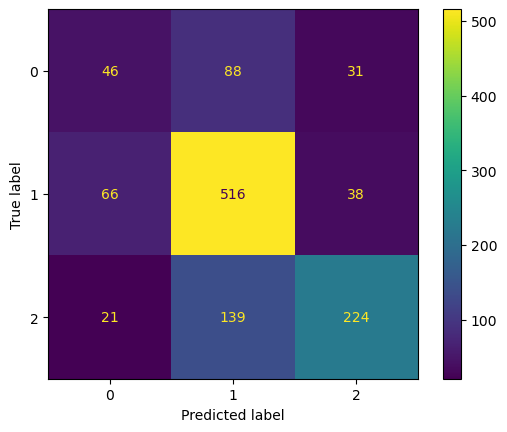

In [194]:
cm1 = confusion_matrix(ytest,ypred1,labels=random_search1.classes_)
display1 = ConfusionMatrixDisplay(confusion_matrix = cm1,display_labels = random_search1.classes_)
display1.plot()
plt.show()

##Random Forest classifier

In [195]:
x = corpus
y = dt["Sentiment"]

In [196]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [197]:
# definig params

In [198]:
params_dist_ = {
    "n_estimators":[50,100,200,300], # number of trees in the forest
    "max_depth":[None,10,20,30], # max depth of the tree
    "min_samples_split":[2,5,10], # minimum number of samples requires to split an internal node
    "min_samples_leaf":[1,2,4], # Minimum number of samples required to be at a leaf node
    "max_features":["auto","sqrt","log2"],
}

In [199]:
# creating randomizedsearchcv object

In [200]:
random_search_rf = RandomizedSearchCV(
    RF,
    param_distributions = params_dist_,
    n_iter = 10,
    cv = 5,
    scoring = "accuracy",
    random_state = 42,
    n_jobs = -1
)

In [201]:
# fitting randomizedsearchcv object to our data
random_search_rf.fit(xtrain,ytrain)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-packag

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [202]:
best_rf_model = random_search_rf.best_estimator_

In [203]:
ypred_rf = best_rf_model.predict(xtest)

In [204]:
# printing the accuracy of test data
accuracy_rf = accuracy_score(ytest,ypred_rf)
print("Test Accuracy : ",accuracy_rf)

Test Accuracy :  0.649272882805817


In [205]:
# printing accuracy of train data
ytrain_rf = random_search_rf.predict(xtrain)
train_rf_acc = accuracy_score(ytrain,ytrain_rf)
print("Train Accuracy : ",train_rf_acc)

Train Accuracy :  0.9280975818531992


In [206]:
cvs2 = cross_val_score(RandomForestClassifier(),x,y,cv=5,scoring="accuracy")
cvs2

array([0.65526091, 0.64927288, 0.6609589 , 0.64982877, 0.64554795])

In [207]:
print("Mean of Cross Val Score : ",cvs2.mean())

Mean of Cross Val Score :  0.6521738812004171


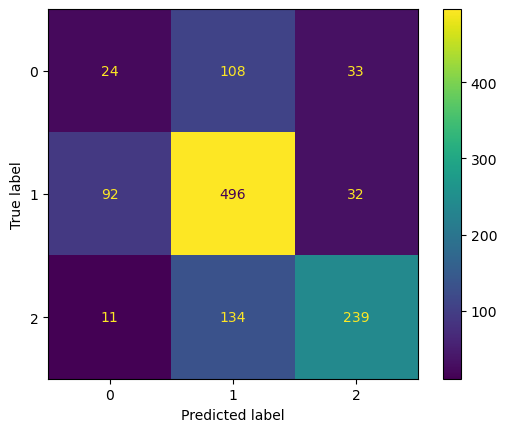

In [208]:
cm2 = confusion_matrix(ytest,ypred_rf,labels=random_search_rf.classes_)
display2 = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=random_search_rf.classes_)
display2.plot()
plt.show()

##XGBOOST


In [210]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 5.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [211]:
from xgboost import XGBClassifier
import scipy.stats

In [212]:
xgb = XGBClassifier()

In [213]:
params_xgb = {
    "learning_rate":scipy.stats.uniform(0.01,0.3),
    "n_estimators" : [50,100,200,300],
    "max_depth" : [3,5,7],
    "subsample" : [0.8,0.9,1.0],
    "colsample_bytree" : [0.8,0.9,1,0]
}

In [214]:
random_xgb = RandomizedSearchCV(xgb,param_distributions = params_xgb,n_iter = 20,cv = 5,scoring = "accuracy",random_state= 42)
random_xgb.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1, 0],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17bf8b9e0>,
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [215]:
# best parameters for tuning
print("Best Parameters : ",random_xgb.best_params_)

Best Parameters :  {'colsample_bytree': 0.9, 'learning_rate': 0.18031009834599745, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


In [216]:
# best model
xgb_model = random_xgb.best_estimator_
xgb_pred = xgb_model.predict(xtest)

In [217]:
xgb_acc = accuracy_score(ytest,xgb_pred)
print("XGB Test Accuracy : ",xgb_acc)

XGB Test Accuracy :  0.6680923866552609


In [218]:
# calculating the train accuracy
train_xgb = random_xgb.predict(xtrain)
xgb_train_acc = accuracy_score(ytrain,train_xgb)
print("XGB Train Accuracy : ",xgb_train_acc)

XGB Train Accuracy :  0.7802268350096297


In [219]:
# calculating the cross validation score
cv3 = cross_val_score(XGBClassifier(),xtrain,ytrain,cv=5,scoring="accuracy")
print("XGB Cross Val Score : ",cv3.mean())

XGB Cross Val Score :  0.6567513655257704


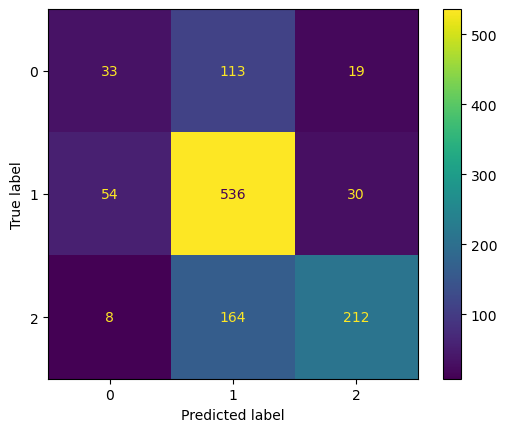

In [220]:
cm3 = confusion_matrix(ytest,xgb_pred,labels=random_xgb.classes_)
display3 = ConfusionMatrixDisplay(confusion_matrix = cm3,display_labels=random_xgb.classes_)
display3.plot()
plt.show()

## SVM

In [221]:
from sklearn.svm import SVC
svm = SVC(kernel="linear",C=0.1)

In [222]:
# Using hyperparamter tuning
svm_params = {
    "C":loguniform(1e-3,1e3),
    "kernel":["linear","rbf","poly"],
    "gamma":["scale","auto"]+list(loguniform(1e-3,1e3).rvs(10))
}

In [223]:
random_svm = RandomizedSearchCV(SVC(),param_distributions=svm_params,n_iter=20,cv=5,scoring="accuracy",random_state=42)
random_svm.fit(xtrain,ytrain)

KeyboardInterrupt: 

In [224]:
# best parameters
print(" Best SVM Parameters : ",random_svm.best_params_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [137]:
# Test Accuracy
svm_best_model = random_svm.best_estimator_
svm_pred = svm_best_model.predict(xtest)

In [138]:
# printing the accuracy
svm_acc =accuracy_score(ytest,svm_pred)
print("SVM Test Accuracy : ",svm_acc)

SVM Test Accuracy :  0.6937553464499572


In [141]:
# train accuracy
svm_train = random_svm.predict(xtrain)
svm_train_acc = accuracy_score(ytrain,svm_train)
print("SVM Train Accuracy : ",svm_train_acc)

SVM Train Accuracy :  0.7755189385833512


In [136]:
# calculating cross val score for svm
cv5 = cross_val_score(SVC(),xtrain,ytrain,cv=5,scoring="accuracy")
print("Cross_Val_Score for SVM : ",cv5.mean())

Cross_Val_Score for SVM :  0.6623124048139793


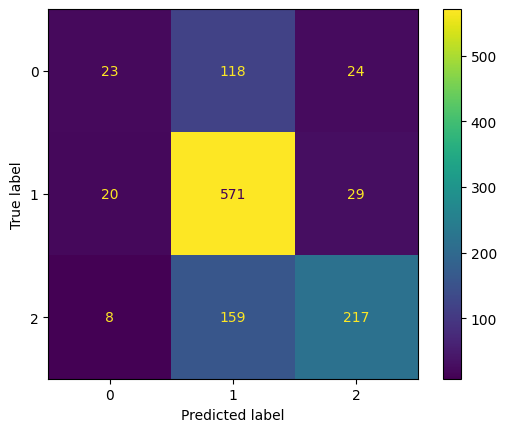

In [143]:
cm5 = confusion_matrix(ytest,svm_pred,labels=random_svm.classes_)
display4 = ConfusionMatrixDisplay(confusion_matrix = cm5,display_labels=random_svm.classes_)
display4.plot()
plt.show()

## Model summary

In [225]:
final_models = pd.DataFrame([
    {"Model":"Logistic Regression", "Train_Score":81.31, "Test_Score":69.88, "Cross_Val_Score":69.10},
    {"Model":"Naive Bayes", "Train_Score":79.58, "Test_Score":66.55, "Cross_Val_Score":68.14},
    {"Model":"Random Forest", "Train_Score":77.78, "Test_Score":68.60, "Cross_Val_Score":65.13},
    {"Model":"XGBoost","Train_Score":80.97, "Test_Score":65.69,"Cross_Val_Score":66.01}
    ])
final_models

,Model,Train_Score,Test_Score,Cross_Val_Score
0,Logistic Regression,81.31,69.88,69.10
1,Naive Bayes,79.58,66.55,68.14
2,Random Forest,77.78,68.60,65.13
3,XGBoost,80.97,65.69,66.01


In [226]:
import pickle

In [227]:
# Save the best_classifier model
with open('final.pkl', 'wb') as model_file:
    pickle.dump(random_search, model_file)
    
# Save the corpus
with open('cv.pkl', 'wb') as cv_file:
    pickle.dump(cv, cv_file)